<a href="https://colab.research.google.com/github/ELHADRINOUHAYLA/Water_Potability/blob/main/Smart_City_Water_Potability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore")




In [ ]:
df = pd.read_csv("water_potability.csv")
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
df.shape

(3276, 10)

In [ ]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
# fill missing values with median of a column
df['Sulfate'] = df['Sulfate'].fillna(value=df['Sulfate'].median())
df['ph'] = df['ph'].fillna(value=df['ph'].median())
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(value=df['Trihalomethanes'].median())
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.073546,392.449580,19.903225,66.622485,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.073546,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.073546,402.883113,11.168946,77.488213,4.708658,1


In [ ]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [ ]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.074194,196.369496,22014.092526,7.122277,333.608364,426.205111,14.284970,66.407478,3.966786,0.390110
std,1.470040,32.879761,8768.570828,1.583085,36.143851,80.824064,3.308162,15.769958,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [ ]:
num_col = (df.columns).to_list()
num_col = num_col[0:]

In [ ]:
def detect_outliers_iqr(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    print('lower bound : ', lwr_bound, '; upper bound : ', upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers

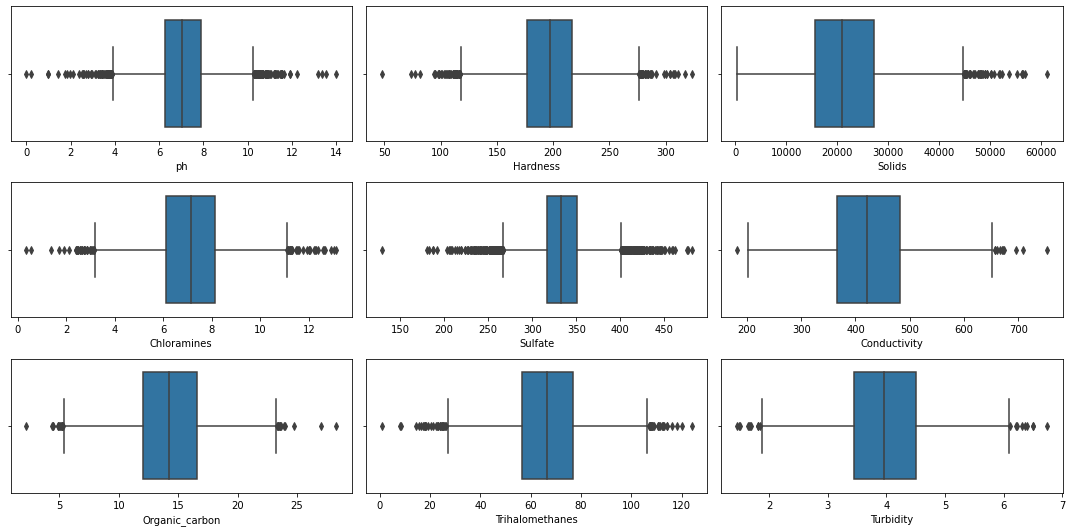

In [ ]:
#Detect outliers by using a boxplot
fig, axs = plt.subplots(3,3, figsize = (15,7.5))
plt1 = sns.boxplot(df['ph'], ax = axs[0,0])
plt2 = sns.boxplot(df['Hardness'], ax = axs[0,1])
plt3 = sns.boxplot(df['Solids'], ax = axs[0,2])
plt4 = sns.boxplot(df['Chloramines'], ax = axs[1,0])
plt5 = sns.boxplot(df['Sulfate'], ax = axs[1,1])
plt6 = sns.boxplot(df['Conductivity'], ax = axs[1,2])
plt7 = sns.boxplot(df['Organic_carbon'], ax = axs[2,0])
plt8 = sns.boxplot(df['Trihalomethanes'], ax = axs[2,1])
plt9 = sns.boxplot(df['Turbidity'], ax = axs[2,2])

plt.tight_layout()

In [ ]:
#Create an outliers function to deal with outliers
def outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1-1.5*IQR
    upper_bound = Q3+1.5*IQR

    for i in range(len(df)):
        if df[column].iloc[i] > upper_bound:
            df[column].iloc[i] = upper_bound
        if df[column].iloc[i] < lower_bound:
            df[column].iloc[i] = lower_bound

for feature in num_col:
    outliers(df, feature)

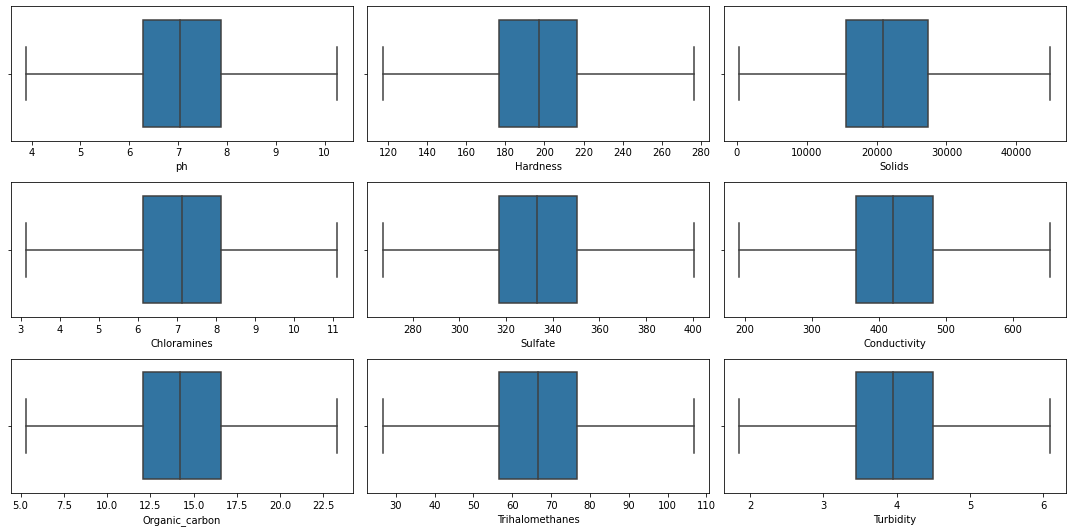

In [ ]:
#Detect outliers by using  boxplot
fig, axs = plt.subplots(3,3, figsize = (15,7.5))
plt1 = sns.boxplot(df['ph'], ax = axs[0,0])
plt2 = sns.boxplot(df['Hardness'], ax = axs[0,1])
plt3 = sns.boxplot(df['Solids'], ax = axs[0,2])
plt4 = sns.boxplot(df['Chloramines'], ax = axs[1,0])
plt5 = sns.boxplot(df['Sulfate'], ax = axs[1,1])
plt6 = sns.boxplot(df['Conductivity'], ax = axs[1,2])
plt7 = sns.boxplot(df['Organic_carbon'], ax = axs[2,0])
plt8 = sns.boxplot(df['Trihalomethanes'], ax = axs[2,1])
plt9 = sns.boxplot(df['Turbidity'], ax = axs[2,2])

plt.tight_layout()

In [ ]:
x = df.iloc[:,[0,1]].values
y = df.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split
  
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = 0.9)
print('Total training Data: ', len(X_train))
print('Total testing Data: ', len(X_test))

Total training Data:  2948
Total testing Data:  328


In [ ]:
# Scale using standard scaler
# The goal is that the range of data and values ​​between attributes is the same
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
# Defines a seed and a value for accuracy 
seed = 7
nilai = 'accuracy'

In [ ]:
models = []

models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('SVM', SVC()))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 7, metric = 'euclidean')))


In [ ]:
# Import library model
from sklearn import model_selection

results = []
names = []

# Dividing data using k-fold cross into training and validation sets
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=nilai)
    results.append(cv_results)
    msg = "%s : %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Decision Tree : 0.558016 (0.028208)
Random Forest : 0.574612 (0.020565)
SVM : 0.620415 (0.009491)
KNN : 0.578345 (0.026118)


# 1. Random Forest

In [ ]:
#Evaluation of the Random Forest algorithm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rf_model = RandomForestClassifier()

rf_model.fit(X_train, y_train)
predictions = rf_model.predict(X_test)

print('accuracy on testing data : ', accuracy_score(y_test, predictions))
print('confusion matrix : ', confusion_matrix(y_test, predictions))
print('classification report : \n', classification_report(y_test, predictions
))

accuracy on testing data :  0.5823170731707317
confusion matrix :  [[142  48]
 [ 89  49]]
classification report : 
               precision    recall  f1-score   support

           0       0.61      0.75      0.67       190
           1       0.51      0.36      0.42       138

    accuracy                           0.58       328
   macro avg       0.56      0.55      0.55       328
weighted avg       0.57      0.58      0.57       328



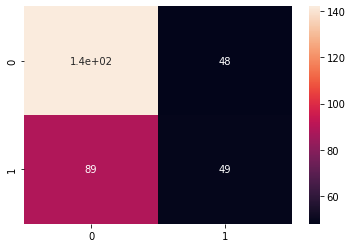

In [ ]:
#Confusion matrix random forest algorithm
RF = confusion_matrix(y_test, predictions)
sns.heatmap(RF, annot=True)

# 2. KNN

In [ ]:
#Evaluation of the KNN algorithm 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn_model = KNeighborsClassifier(n_neighbors = 7, metric = 'euclidean')

knn_model.fit(X_train, y_train)
predictions = knn_model.predict(X_test)

print('accuracy on testing data : ', accuracy_score(y_test, predictions))
print('confusion matrix : ', confusion_matrix(y_test, predictions))
print('classification report : \n', classification_report(y_test, predictions
))

accuracy on testing data :  0.5579268292682927
confusion matrix :  [[145  45]
 [100  38]]
classification report : 
               precision    recall  f1-score   support

           0       0.59      0.76      0.67       190
           1       0.46      0.28      0.34       138

    accuracy                           0.56       328
   macro avg       0.52      0.52      0.51       328
weighted avg       0.54      0.56      0.53       328



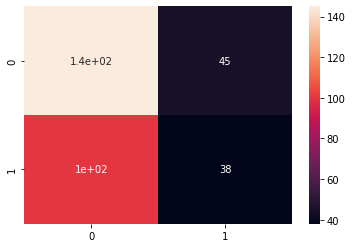

In [ ]:
#Confusion matrix KNN Algorithm 
KNN = confusion_matrix(y_test, predictions)
sns.heatmap(KNN, annot=True)

# 3. SVM

In [ ]:
#Evaluation of SVM algorithm 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

svm_model = SVC()

svm_model.fit(X_train, y_train)
predictions = svm_model.predict(X_test)

print('accuracy on testing data: ', accuracy_score(y_test, predictions))
print('confusion matrix : ', confusion_matrix(y_test, predictions))
print('classification report : \n', classification_report(y_test, predictions
))

accuracy on testing data:  0.5823170731707317
confusion matrix :  [[186   4]
 [133   5]]
classification report : 
               precision    recall  f1-score   support

           0       0.58      0.98      0.73       190
           1       0.56      0.04      0.07       138

    accuracy                           0.58       328
   macro avg       0.57      0.51      0.40       328
weighted avg       0.57      0.58      0.45       328



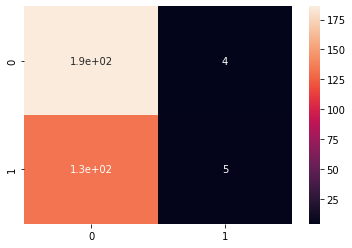

In [ ]:
#Confusion matrix of SVM algorithm 
SVM = confusion_matrix(y_test, predictions)
sns.heatmap(SVM, annot=True)